In [9]:
# Downloading Packages
! pip install numpy
! pip install matplotlib

In [10]:
#import statements
import numpy as np
import random
from random import randint
import matplotlib.pyplot as plt

In [11]:
# low = lower range for variables, high = higher range for variables
def genesis(size,var, high , low):
   pop_size = (size,var)
   new_pop = np.random.uniform(low=low,high=high,size=pop_size)
   return new_pop

In [12]:
def fitness(p):
# Evaluating fitness Interference function "double fit (doublep[])".
   fitness=np.zeros((len(p),1))
   for i in range(len(p)):
       x,y,z = p[i][0] , p[i][1] , p[i][2]
        # Define your fitness function here
       fitness[i,0] = 2*x*z*np.exp(-x) - 2*y**3 + y**2 - 3*z**3
   return fitness

In [13]:
def selection(pop, fitness, num_parents):
   parents = np.empty((num_parents, pop.shape[1]))
   for parent_num in range(num_parents):
      max_fitness_idx = np.where(fitness == np.max(fitness))
      max_fitness_idx = max_fitness_idx[0][0]
      parents[parent_num, :] = pop[max_fitness_idx, :]
      fitness[max_fitness_idx] = -99999999999
   return parents

In [14]:
def crossover(parents, offspring_size):
   offspring = np.empty(offspring_size)
   crossover_point = np.uint8(offspring_size[1]/2)
   for k in range(offspring_size[0]):
      parent1_idx = k%parents.shape[0]
      parent2_idx = (k+1)%parents.shape[0]
      offspring[k, 0:crossover_point] = parents[parent1_idx,     0:crossover_point]
      offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
   return offspring

In [15]:
def mutation(offspring_crossover):
   for idx in range(offspring_crossover.shape[0]):
      random_value = np.random.uniform(-10, 10, 1)
# 10 percent change maximum keeping 90 percent mutation rate 
      i= randint(0, 2)
      offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value 
   return offspring_crossover

In [16]:
import numpy as np
from random import randint

num_var = 3
sizeof_pop= 100
upper_limit = 100
lower_limit = -100
num_parents = 2

population = genesis(sizeof_pop , num_var, upper_limit ,lower_limit)
print(population)
Scores=[]
num_generations = 20
for generation in range(num_generations):
   print("\n\nGeneration : ", generation)
   fitness_score = fitness(population)
   parents = selection(population, fitness_score, num_parents)
   print("Best Parents \n",parents)
   offspring_crossover = crossover(parents, offspring_size=(2*num_parents, num_var))
   offspring_mutation = mutation(offspring_crossover)
   print("Mutated OffSprings\n",offspring_mutation)
   population[0:parents.shape[0], :] = parents
   population[parents.shape[0]:6, :] = offspring_mutation
   Scores.append(np.max(fitness_score))
   print("Best result : ", np.max(fitness_score))

[[ 78.96432864   7.43898266 -23.62874917]
 [-67.20690606 -15.10239801 -43.07472037]
 [ 68.1581004  -51.78732173 -97.33900232]
 [ 68.53718082 -50.91504809  12.8194572 ]
 [ 58.95123661  60.0696868   76.94835116]
 [ -1.87701645  29.47908804  28.89383647]
 [ 56.32107605 -71.8151048  -94.49762432]
 [-50.40146779  25.88109349 -51.73518288]
 [-19.87903565  -8.01620164  76.60185151]
 [-51.98597096 -28.01985973  67.89713717]
 [ 87.90486032 -28.47092015  38.59187803]
 [ 86.66054131  26.55742555  56.77815818]
 [ 66.27754262   4.60452966  51.54021988]
 [ 98.85399896  90.34885432 -40.1162709 ]
 [-52.44169691  76.35851007 -76.57897828]
 [ 76.65921204 -25.37425965  18.85355619]
 [-90.08917944 -97.94012371  35.1319217 ]
 [-19.04822727  19.24810639  90.65296141]
 [-23.27019793  17.35457025  -5.54326406]
 [ 62.4437442   -3.63060946  -3.53930777]
 [ 61.92664721  -3.41766565  17.49979154]
 [-18.73517444 -71.7157942   55.0435239 ]
 [ 60.55295465  39.01661553  66.68662935]
 [ 18.73233167  66.43299429 -55.64

C:\Users\mvsak\AppData\Local\Temp\ipykernel_21384\4059749975.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value


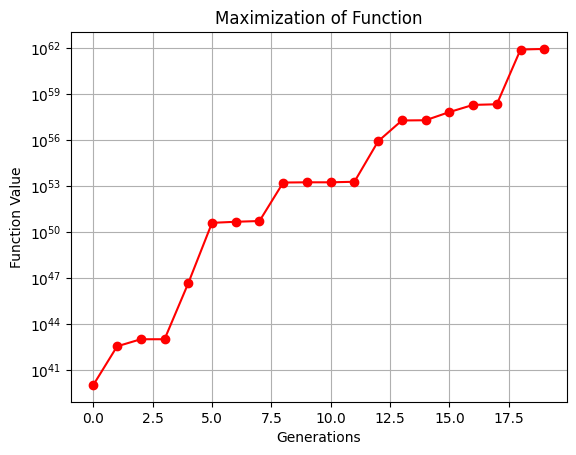

In [17]:
Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.yscale('log')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()